In [2]:
%matplotlib ipympl

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation

import optitrack.csv_reader as csv
from optitrack.geometry import *

filename = "../material/60fps/ProvaRigidBody.csv"

### READ CSV AND LOAD DATA

In [3]:
# Read the file.
take = csv.Take().readCSV(filename)


# Print out some statistics
print("Found rigid bodies:", take.rigid_bodies.keys())

# Process the first rigid body into a set of planes.
bodies = take.rigid_bodies
  



bones_pos = []
rigid_body_markers_pos = []
markers_pos = []
if len(bodies) > 0:
    for body in bodies: 
        bones = take.rigid_bodies[body]
        n_frames = bones.num_total_frames()
        bones_pos.append(bones.positions)
        for marker in bones.rigid_body_markers.values():
            rigid_body_markers_pos.append(marker.positions)
        for marker in bones.rigid_body_markers.values():
            markers_pos.append(marker.positions)

# substitute with [0,0,0] 'None' values
# matrix = [[0,0,0] if elem is None else elem for elem in bones_pos[0]]
points = bones_pos + rigid_body_markers_pos + markers_pos

#points = [[0.0,0.0,0.0] if elem is None else elem for elem in markers for markers in points ]
points = [[[0.0, 0.0, 0.0] if frame is None else frame for frame in markers] for markers in points]

np_points = np.array(points)
print((np_points))

# Extract x, y, z coordinates from the data



#positions = np.array([x, y, z]).T


Found rigid bodies: dict_keys(['Ragnetto'])
[[[-0.087448  0.994073 -0.794972]
  [-0.087959  0.994178 -0.794836]
  [-0.088511  0.99475  -0.794814]
  ...
  [-0.820531  0.015722 -0.845715]
  [-0.820504  0.015692 -0.845735]
  [-0.820508  0.015683 -0.845734]]

 [[ 0.77698   0.990646 -0.741454]
  [ 0.77698   0.990541 -0.741855]
  [ 0.804843  0.990495 -0.742302]
  ...
  [ 0.85931   0.01518  -0.782694]
  [ 0.858425  0.015124 -0.782749]
  [ 0.866588  0.015123 -0.782752]]

 [[ 0.        0.968103 -0.709216]
  [ 0.        0.968983 -0.708893]
  [ 0.        0.970126 -0.70873 ]
  ...
  [ 0.922222  0.014752 -0.755053]
  [ 0.919779  0.014769 -0.755075]
  [ 0.931878  0.014771 -0.755074]]

 ...

 [[ 0.        0.968103 -0.709216]
  [ 0.        0.968983 -0.708893]
  [ 0.        0.970126 -0.70873 ]
  ...
  [ 0.922222  0.014752 -0.755053]
  [ 0.919779  0.014769 -0.755075]
  [ 0.931878  0.014771 -0.755074]]

 [[ 0.954169  1.009977 -0.806349]
  [ 0.954169  1.009255 -0.806911]
  [ 0.925692  1.008734 -0.807482]


### DISPLACE ANIMATION

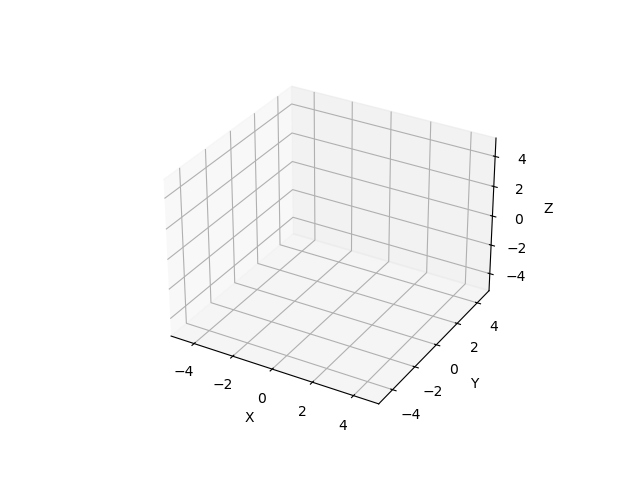

In [10]:


# Plot properties
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel('Z')

# ax.set_xlim(np.min(x), np.max(x))
# ax.set_ylim(np.min(y), np.max(y))
# ax.set_zlim(np.min(z), np.max(z))
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)

txt = fig.suptitle('')

# initialize empty set of points
points, = ax.plot([], [], [], "o")

# define an animation function
# this determines the plot's behavior at each frame
def update(t,points):
    print("....")
    txt.set_text('frame={:d}'.format(t))
    
    # update properties
    # updated_positions = np.array((x[t], y[t], z[t]), dtype=float)
    points.set_data_3d(points[:,t])

    # return modified artists
    return points, txt

ani=animation.FuncAnimation(fig, update, frames=n_frames, fargs=np_points.all()) 
#ani.save(filename="animations/animation.gif", writer="pillow", fps=60)

plt.show()